<a href="https://colab.research.google.com/github/ygorml/EO-1/blob/main/AIDev_Dataset_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Obtenção dos Pacotes

In [44]:
!pip install huggingface-hub --upgrade

In [45]:
import fsspec, os
fs = fsspec.filesystem("hf", token=None)
for f in fs.ls("datasets/hao-li/AIDev"):
    print(os.path.basename(f['name'])) # Access the 'name' key

.DS_Store
.gitattributes
README.md
aidev_logo.png
all_pull_request.parquet
all_repository.parquet
all_user.parquet
data_table.md
human_pr_task_type.parquet
human_pull_request.parquet
issue.parquet
pr_comments.parquet
pr_commit_details.parquet
pr_commits.parquet
pr_cumulative.png
pr_review_comments.parquet
pr_review_comments_v2.parquet
pr_reviews.parquet
pr_task_type.parquet
pr_timeline.parquet
pull_request.parquet
related_issue.parquet
repository.parquet
schema.png
user.parquet


## Imports necessários

In [46]:
import pandas as pd

# Login using e.g. `huggingface-cli login` to access this dataset
df_pr = pd.read_parquet("hf://datasets/hao-li/AIDev/all_pull_request.parquet")
df_repo = pd.read_parquet("hf://datasets/hao-li/AIDev/all_repository.parquet")
df_user = pd.read_parquet("hf://datasets/hao-li/AIDev/all_user.parquet")
df_timeline = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_timeline.parquet")
df_commits = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_commits.parquet")
df_commits_details = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_commit_details.parquet")
df_comments = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_comments.parquet")

In [47]:
from huggingface_hub import hf_hub_download
import os

# Define the dataset repository and file names
repo_id = "hao-li/AIDev"
filenames = [
    "all_pull_request.parquet",
    "all_repository.parquet",  # Corrected filename
    "all_user.parquet", # Corrected filename,
    "pr_timeline.parquet",
    "pr_comments.parquet",
    "pr_review_comments_v2.parquet",
    "pr_reviews.parquet",
    "pr_commits.parquet",
    "pr_commit_details.parquet"
]

# Define a local directory to save the files
local_dir = "./AIDev_data"
os.makedirs(local_dir, exist_ok=True)

# Download each file
for filename in filenames:
    hf_hub_download(
        repo_id=repo_id,
        filename=filename,
        local_dir=local_dir,
        repo_type="dataset"
    )

print(f"Downloaded files to {local_dir}")

Downloaded files to ./AIDev_data


# Exploração Inicial do Dataset "AIDev"
- Fonte: https://huggingface.co/datasets/hao-li/AIDev
- Artigo "The Rise of AI Teammates in Software Engineering (SE) 3.0": https://arxiv.org/pdf/2507.15003
<br>
AIDev is organized into normalized tables (available as CSVs) that can be joined via consistent keys. The core components include:

- `all_pull_request`: PR-level data (ID, title, body, agent label, user info,state, timestamps)
- `all_repository`: Metadata including license, language, stars, forks, and project-level info
- `all_user`: User information such as id, login, and created date (personally information has been removed to address privacy concerns)

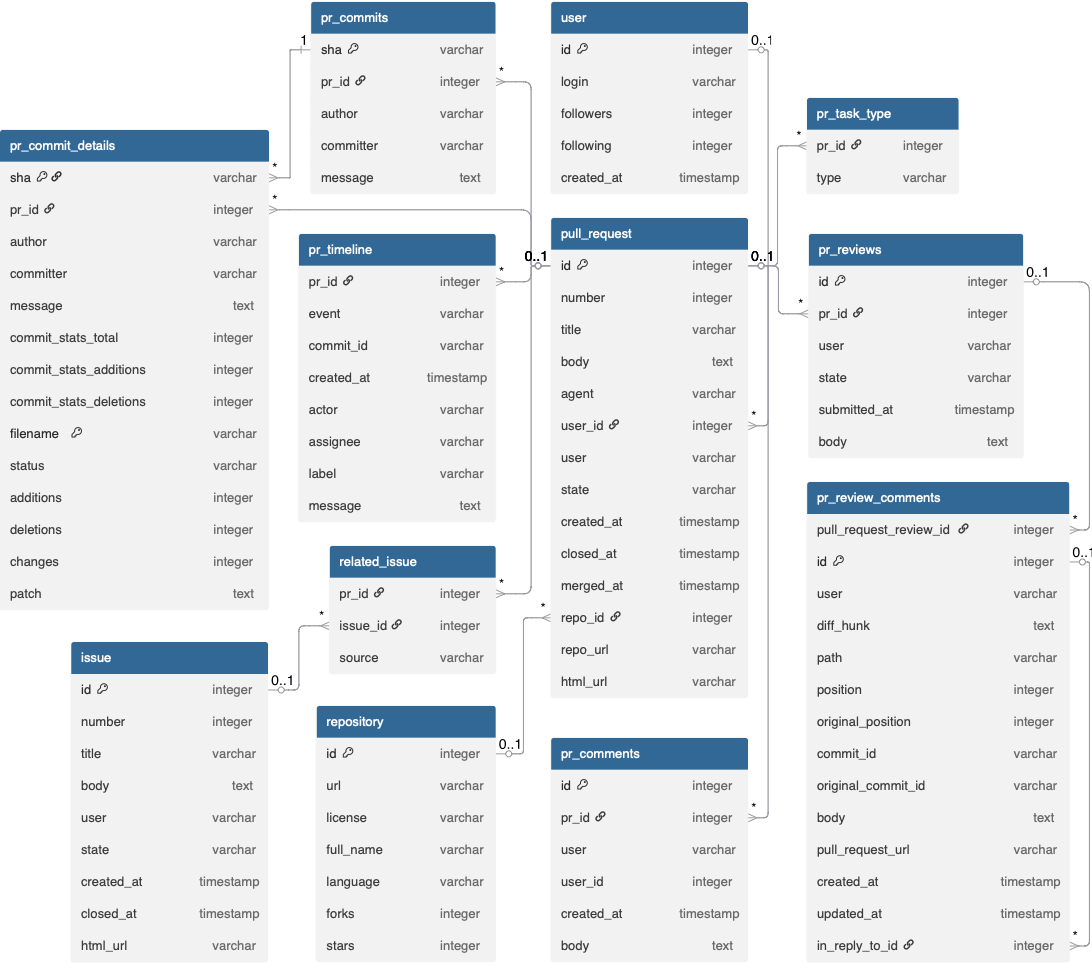

## Exploração Inicial do Dataset "df_pr"

In [48]:
df_pr.head()

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url
0,3264016139,1688,`metta code` --> `metta clip` and additional p...,Remove unused `root_key` variable to fix ruff ...,Claude_Code,37011,jacklionheart,closed,2025-07-25T18:15:36Z,2025-07-25T19:17:23Z,2025-07-25T19:17:23Z,8.439884e+08,https://api.github.com/repos/Metta-AI/metta,https://github.com/Metta-AI/metta/pull/1688
1,3264021033,41,feat: Comprehensive ruff error resolution with...,## 🎯 Mission Accomplished: 100% Ruff Error Res...,Claude_Code,131842369,Draco3310,open,2025-07-25T18:17:57Z,None,None,9.920635e+08,https://api.github.com/repos/Draco3310/Gal-Fri...,https://github.com/Draco3310/Gal-Friday2/pull/41
2,3264042289,1600,Add Evals frontend implementation plan and HTM...,\nCreate comprehensive implementation plan for...,Claude_Code,6766889,justicart,closed,2025-07-25T18:26:15Z,2025-07-25T23:19:14Z,None,9.267118e+08,https://api.github.com/repos/bolt-foundry/bolt...,https://github.com/bolt-foundry/bolt-foundry/p...
3,3264042318,1601,Add 4 new BfDs components for Evals interface ...,\nPhase 1 component creation for the Evals fro...,Claude_Code,6766889,justicart,closed,2025-07-25T18:26:16Z,2025-07-25T23:19:11Z,None,9.267118e+08,https://api.github.com/repos/bolt-foundry/bolt...,https://github.com/bolt-foundry/bolt-foundry/p...
4,3264067496,3,🚀 Complete Frontend-Backend API Integration wi...,## 🎯 Summary\n\nThis PR completes the **fronte...,Claude_Code,42357482,twitchyvr,closed,2025-07-25T18:39:14Z,2025-07-25T18:48:47Z,2025-07-25T18:48:47Z,1.025871e+09,https://api.github.com/repos/twitchyvr/Spaghetti,https://github.com/twitchyvr/Spaghetti/pull/3


In [49]:
df_pr.shape # 932791 pull-requests

(932791, 14)

In [50]:
df_pr.columns

Index(['id', 'number', 'title', 'body', 'agent', 'user_id', 'user', 'state',
       'created_at', 'closed_at', 'merged_at', 'repo_id', 'repo_url',
       'html_url'],
      dtype='object')

In [51]:
display(df_pr['agent'].unique())

array(['Claude_Code', 'Copilot', 'OpenAI_Codex', 'Cursor', 'Devin'],
      dtype=object)

### Buscando informações sobre os dados do Claude_Code

In [52]:
claude_df = df_pr[df_pr['agent'] == 'Claude_Code']
display(claude_df.head())

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url
0,3264016139,1688,`metta code` --> `metta clip` and additional p...,Remove unused `root_key` variable to fix ruff ...,Claude_Code,37011,jacklionheart,closed,2025-07-25T18:15:36Z,2025-07-25T19:17:23Z,2025-07-25T19:17:23Z,8.439884e+08,https://api.github.com/repos/Metta-AI/metta,https://github.com/Metta-AI/metta/pull/1688
1,3264021033,41,feat: Comprehensive ruff error resolution with...,## 🎯 Mission Accomplished: 100% Ruff Error Res...,Claude_Code,131842369,Draco3310,open,2025-07-25T18:17:57Z,None,None,9.920635e+08,https://api.github.com/repos/Draco3310/Gal-Fri...,https://github.com/Draco3310/Gal-Friday2/pull/41
2,3264042289,1600,Add Evals frontend implementation plan and HTM...,\nCreate comprehensive implementation plan for...,Claude_Code,6766889,justicart,closed,2025-07-25T18:26:15Z,2025-07-25T23:19:14Z,None,9.267118e+08,https://api.github.com/repos/bolt-foundry/bolt...,https://github.com/bolt-foundry/bolt-foundry/p...
3,3264042318,1601,Add 4 new BfDs components for Evals interface ...,\nPhase 1 component creation for the Evals fro...,Claude_Code,6766889,justicart,closed,2025-07-25T18:26:16Z,2025-07-25T23:19:11Z,None,9.267118e+08,https://api.github.com/repos/bolt-foundry/bolt...,https://github.com/bolt-foundry/bolt-foundry/p...
4,3264067496,3,🚀 Complete Frontend-Backend API Integration wi...,## 🎯 Summary\n\nThis PR completes the **fronte...,Claude_Code,42357482,twitchyvr,closed,2025-07-25T18:39:14Z,2025-07-25T18:48:47Z,2025-07-25T18:48:47Z,1.025871e+09,https://api.github.com/repos/twitchyvr/Spaghetti,https://github.com/twitchyvr/Spaghetti/pull/3


In [53]:
percentage_claude = (len(claude_df) / len(df_pr)) * 100
print(f"A porcentagem de entradas cujo agente é 'Claude_Code' é: {percentage_claude:.2f}%")

A porcentagem de entradas cujo agente é 'Claude_Code' é: 0.55%


In [54]:
claude_df.shape

(5137, 14)

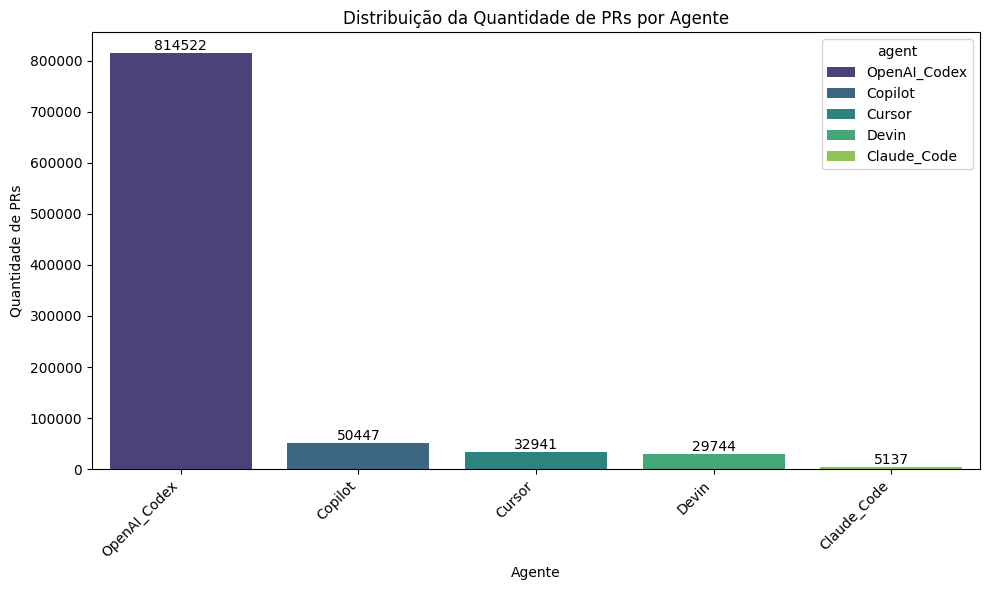

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribuição dos PRs por Agente
pr_counts = df_pr['agent'].value_counts().reset_index()
pr_counts.columns = ['agent', 'pr_count']

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='agent', y='pr_count', hue='agent', data=pr_counts, palette='viridis', legend=True)
plt.title('Distribuição da Quantidade de PRs por Agente')
plt.xlabel('Agente')
plt.ylabel('Quantidade de PRs')
plt.xticks(rotation=45, ha='right')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.tight_layout()
plt.show()

In [56]:
df_pr = df_pr[df_pr['agent'] != 'Claude_Code']

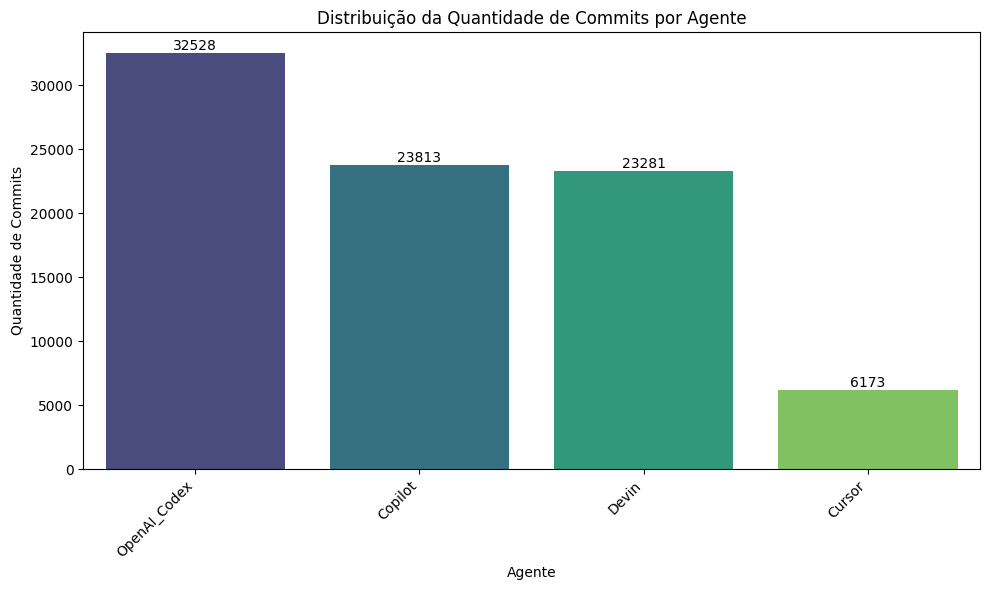

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Join df_commits with df_pr to get agent information for each commit
# Assuming 'id' in df_pr is the foreign key for 'pr_id' in df_commits
commits_with_agent = df_commits.merge(df_pr[['id', 'agent']], left_on='pr_id', right_on='id', how='left')

# Drop the redundant 'id' column from the merge
commits_with_agent = commits_with_agent.drop(columns='id')

# Count the number of commits per agent
commits_per_agent = commits_with_agent['agent'].value_counts().reset_index()
commits_per_agent.columns = ['agent', 'commit_count']

# Visualize the distribution
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='agent', y='commit_count', hue='agent', data=commits_per_agent, palette='viridis', legend=False)
plt.title('Distribuição da Quantidade de Commits por Agente')
plt.xlabel('Agente')
plt.ylabel('Quantidade de Commits')
plt.xticks(rotation=45, ha='right')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.tight_layout()
plt.show()

In [58]:
df_commits.shape

(88576, 5)

In [59]:
df_commits.head()

,sha,pr_id,author,committer,message
0,15a543882cbad0c9348640cffdd71fb71ac34953,3205734508,rubys,rubys,refactor: Convert Build.Compose from string to...
1,cdd9bab35891037692f1d201db37d34d48342332,3107321792,haasonsaas,haasonsaas,Fix Windows compatibility issues in shell exec...
2,219323e2aa1dacd76a422ad24cabf6976c9a6ac0,3107321792,haasonsaas,haasonsaas,Add Windows path validation fixes and comprehe...
3,58c52841e96e9fdcb70befadf7b3994519834861,3107321792,haasonsaas,haasonsaas,Address CodeRabbit review feedback - fix criti...
4,b04470fe6bae5e6802f1fe83e7c5f0b9273e74a3,3107321792,haasonsaas,haasonsaas,Fix Windows compatibility tests - address patt...


Considerando que o df_commits tem 88.576 commits e o df_pr tem 932.791 pull requests, isso sugere que muitos PRs neste dataset têm poucos ou nenhum commit listado em df_commits, ou que df_commits não captura todos os commits associados a todos os PRs.

Isso indica que muitos PRs são mergeados diretamente sem nenhum commit adicional.

### Criação do df_filtered (df_pr sem o Claude_Code)

In [60]:
df_filtered = df_pr[df_pr['agent'] != 'Claude_Code']
display(df_filtered.head())

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url
5137,3221027600,21,Fix stream freezing issue where video freezes ...,## Problem\nUsers reported streams freezing on...,Copilot,198982749,Copilot,closed,2025-07-11T00:00:26Z,2025-07-11T19:40:16Z,2025-07-11T19:40:16Z,1.003239e+09,https://api.github.com/repos/Zero3K/Tardsplaya,https://github.com/Zero3K/Tardsplaya/pull/21
5138,3221029457,134,Implement Milter Protocol Filter Interface wit...,This PR implements a complete Milter protocol ...,Copilot,198982749,Copilot,closed,2025-07-11T00:01:36Z,2025-07-11T03:26:51Z,2025-07-11T03:26:51Z,1.010156e+09,https://api.github.com/repos/forever-august/re...,https://github.com/forever-august/renews/pull/134
5139,3221030246,1,Fix story text centering in Wattpad reading pa...,## Problem\n\nThe current userscript centers `...,Copilot,198982749,Copilot,open,2025-07-11T00:02:01Z,None,None,9.890745e+08,https://api.github.com/repos/Myst1cX/better-wa...,https://github.com/Myst1cX/better-wattpad/pull/1
5140,3221032629,837,refactor: update zod to v4.0.0 and fix imports,- [x] Analyze current codebase and zod usage p...,Copilot,198982749,Copilot,closed,2025-07-11T00:03:44Z,2025-07-11T16:40:38Z,2025-07-11T16:40:38Z,7.284322e+08,https://api.github.com/repos/ssilve1989/ulti-p...,https://github.com/ssilve1989/ulti-project/pul...
5141,3221034358,34,feat: Add maintenance completion status with a...,## Overview\n\nImplements a new maintenance co...,Copilot,198982749,Copilot,closed,2025-07-11T00:05:07Z,2025-07-11T00:06:03Z,None,9.971199e+08,https://api.github.com/repos/Dragon-Pyramid/gy...,https://github.com/Dragon-Pyramid/gym-master/p...


In [61]:
df_filtered.shape

(927654, 14)

In [62]:
df_filtered_codex = df_pr[df_pr['agent'] == 'OpenAI_Codex'] # df_pr somente com o OpenAI_Codex

In [63]:
df_filtered_codex.shape

(814522, 14)

In [64]:
df_filtered_codex.head()

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url
55584,3122393615,45,Improve FICA estimate helpers,## Summary\n- refine FICA helper functions\n- ...,OpenAI_Codex,130411308,mattb3113,closed,2025-06-05T19:28:33Z,2025-06-05T19:29:00Z,2025-06-05T19:29:00Z,996823776.0,https://api.github.com/repos/mattb3113/docs,https://github.com/mattb3113/docs/pull/45
55585,3122395724,55,Add message deletion and read receipts,## Summary\r\n- refine chat UI with read recei...,OpenAI_Codex,84555510,AusBoone,closed,2025-06-05T19:29:23Z,2025-06-05T19:29:45Z,2025-06-05T19:29:44Z,633640641.0,https://api.github.com/repos/AusBoone/PrivateLine,https://github.com/AusBoone/PrivateLine/pull/55
55586,3122408581,20,Fix cdscli to persist CDS and zone updates,## Summary\n- write CDS files and update zones...,OpenAI_Codex,23141173,jgwill,closed,2025-06-05T19:33:22Z,2025-06-05T20:17:57Z,2025-06-05T20:17:57Z,569242530.0,https://api.github.com/repos/jgwill/jgtpy,https://github.com/jgwill/jgtpy/pull/20
55587,3122417785,79,Use shared RabbitMQ client,## Summary\n- expose RabbitMQ service from sha...,OpenAI_Codex,88899913,Mohammedareebali,closed,2025-06-05T19:36:58Z,2025-06-05T19:37:28Z,2025-06-05T19:37:28Z,996361900.0,https://api.github.com/repos/Mohammedareebali/...,https://github.com/Mohammedareebali/send/pull/79
55588,3122418753,125,Split large css file,## Summary\n- divide the huge `style.css` into...,OpenAI_Codex,98446918,rdwr-taly,closed,2025-06-05T19:37:20Z,2025-06-05T19:37:42Z,2025-06-05T19:37:42Z,983675963.0,https://api.github.com/repos/Radware/radware-v...,https://github.com/Radware/radware-vulnerable-...


In [65]:
df_copilot = df_pr[df_pr['agent'] == 'Copilot']
display(df_copilot.head())

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url
5137,3221027600,21,Fix stream freezing issue where video freezes ...,## Problem\nUsers reported streams freezing on...,Copilot,198982749,Copilot,closed,2025-07-11T00:00:26Z,2025-07-11T19:40:16Z,2025-07-11T19:40:16Z,1.003239e+09,https://api.github.com/repos/Zero3K/Tardsplaya,https://github.com/Zero3K/Tardsplaya/pull/21
5138,3221029457,134,Implement Milter Protocol Filter Interface wit...,This PR implements a complete Milter protocol ...,Copilot,198982749,Copilot,closed,2025-07-11T00:01:36Z,2025-07-11T03:26:51Z,2025-07-11T03:26:51Z,1.010156e+09,https://api.github.com/repos/forever-august/re...,https://github.com/forever-august/renews/pull/134
5139,3221030246,1,Fix story text centering in Wattpad reading pa...,## Problem\n\nThe current userscript centers `...,Copilot,198982749,Copilot,open,2025-07-11T00:02:01Z,None,None,9.890745e+08,https://api.github.com/repos/Myst1cX/better-wa...,https://github.com/Myst1cX/better-wattpad/pull/1
5140,3221032629,837,refactor: update zod to v4.0.0 and fix imports,- [x] Analyze current codebase and zod usage p...,Copilot,198982749,Copilot,closed,2025-07-11T00:03:44Z,2025-07-11T16:40:38Z,2025-07-11T16:40:38Z,7.284322e+08,https://api.github.com/repos/ssilve1989/ulti-p...,https://github.com/ssilve1989/ulti-project/pul...
5141,3221034358,34,feat: Add maintenance completion status with a...,## Overview\n\nImplements a new maintenance co...,Copilot,198982749,Copilot,closed,2025-07-11T00:05:07Z,2025-07-11T00:06:03Z,None,9.971199e+08,https://api.github.com/repos/Dragon-Pyramid/gy...,https://github.com/Dragon-Pyramid/gym-master/p...


In [66]:
df_copilot.shape

(50447, 14)

## Exploração Inicial do Dataset 'df_repo'

In [67]:
df_repo.shape

(116211, 7)

In [68]:
df_repo.columns

Index(['id', 'url', 'license', 'full_name', 'language', 'forks', 'stars'], dtype='object')

In [69]:
df_repo.head()

,id,url,license,full_name,language,forks,stars
0,987641962,https://api.github.com/repos/1010-dev/senjudev...,None,1010-dev/senjudev-site,TypeScript,1.0,0.0
1,990249393,https://api.github.com/repos/106-/HellSinkerWa...,None,106-/HellSinkerWallPaper,Java,0.0,0.0
2,1009549206,https://api.github.com/repos/1genadam/tileshop...,None,1genadam/tileshop-rag,Python,0.0,0.0
3,983546765,https://api.github.com/repos/1kimnet/ETL-pipeline,None,1kimnet/ETL-pipeline,Python,0.0,0.0
4,1024190983,https://api.github.com/repos/20m61/lightningta...,None,20m61/lightningtalk-circle,JavaScript,0.0,0.0


## Exploração Inicial do Dataset 'df_user'

In [70]:
df_user.shape

(72189, 5)

In [71]:
df_user.columns

Index(['id', 'login', 'followers', 'following', 'created_at'], dtype='object')

In [72]:
df_user.head()

,id,login,followers,following,created_at
0,149159513.0,00012122Cs,0.0,0.0,2023-10-27T10:22:50Z
1,86906973.0,000Sean000,0.0,2.0,2021-07-04T07:05:40Z
2,36679210.0,000alen,46.0,106.0,2018-02-20T21:00:55Z
3,201261210.0,000qhrey,0.0,1.0,2025-02-28T16:53:21Z
4,22735204.0,00125495,0.0,1.0,2016-10-10T01:24:34Z


In [73]:
df_user.tail()

,id,login,followers,following,created_at
72184,128873850.0,zztime04,0.0,1.0,2023-03-25T01:50:00Z
72185,46803451.0,zzy1099207684,0.0,1.0,2019-01-18T02:51:48Z
72186,35818234.0,zzzpotato,2.0,0.0,2018-01-25T20:59:53Z
72187,55004427.0,zzzsaft,1.0,0.0,2019-09-06T21:50:29Z
72188,46273764.0,zzzz465,42.0,71.0,2018-12-31T04:08:21Z


In [74]:
df_user.followers.describe()

,followers
count,72167.000000
mean,22.376183
std,353.254209
min,0.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,45077.000000


In [75]:
df_user.following.describe()

,following
count,72167.000000
mean,12.116314
std,135.483399
min,0.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,16742.000000


In [76]:
df_pr.columns

Index(['id', 'number', 'title', 'body', 'agent', 'user_id', 'user', 'state',
       'created_at', 'closed_at', 'merged_at', 'repo_id', 'repo_url',
       'html_url'],
      dtype='object')

## Exploração Inicial do dataset 'pr_timeline'

In [77]:
# Não consta no Dicionário do AIDev quais são os possíveis valores do campo 'event' da tabela 'pr_timeline'.
# Utilizei o método unique para encontrar as combinações possíveis de 'events' para esse dataset.

events_series = df_timeline['event'].unique()

for value in events_series:
  print(value)

head_ref_force_pushed
committed
merged
closed
head_ref_deleted
commented
reviewed
renamed
unsubscribed
labeled
deployed
review_requested
mentioned
subscribed
assigned
referenced
base_ref_changed
review_request_removed
unlabeled
auto_squash_enabled
automatic_base_change_succeeded
connected
convert_to_draft
ready_for_review
added_to_merge_queue
removed_from_merge_queue
base_ref_force_pushed
auto_merge_enabled
auto_merge_disabled
milestoned
marked_as_duplicate
locked
reopened
head_ref_restored
review_dismissed
unassigned
comment_deleted
demilestoned
base_ref_deleted
copilot_work_started
copilot_work_finished
copilot_work_finished_failure
auto_rebase_enabled
disconnected
unlocked
user_blocked


### Explorando os dados para o PR_ID == 3107321792

In [78]:
df_timeline[df_timeline['pr_id'] == 3107321792].head(50)

,pr_id,event,commit_id,created_at,actor,assignee,label,message
6,3107321792,committed,cdd9bab35891037692f1d201db37d34d48342332,None,Jonathan Haas,None,None,Fix Windows compatibility issues in shell exec...
7,3107321792,committed,219323e2aa1dacd76a422ad24cabf6976c9a6ac0,None,Jonathan Haas,None,None,Add Windows path validation fixes and comprehe...
8,3107321792,committed,58c52841e96e9fdcb70befadf7b3994519834861,None,Jonathan Haas,None,None,Address CodeRabbit review feedback - fix criti...
9,3107321792,committed,b04470fe6bae5e6802f1fe83e7c5f0b9273e74a3,None,Jonathan Haas,None,None,Fix Windows compatibility tests - address patt...
10,3107321792,committed,3d4a61a29a1eec88b81da0aa0c620623f1ae3d45,None,Jonathan Haas,None,None,Complete Windows compatibility test fixes - al...
11,3107321792,committed,b8b7f0bdd7ac2bcac09115316b40b80ffab9e5aa,None,Jonathan Haas,None,None,Fix all remaining Windows CI test failures - c...
12,3107321792,committed,4ae08a059ca054c055ce969f0a40e8c915b8e7f5,None,Jonathan Haas,None,None,Address CodeRabbit and Copilot review feedback...
13,3107321792,committed,21b1791f823955ec39356fc4343253d5e5a48be0,None,Jonathan Haas,None,None,Fix Windows Git repository file locking issues...
14,3107321792,commented,None,2025-06-01T14:15:35Z,coderabbitai[bot],None,None,<!-- This is an auto-generated comment: summar...
15,3107321792,reviewed,9e6f7e72855d0e160c72dae5e6163c9d7cdfd6d0,None,None,None,None,None


### Explorando os dados para o PR_ID == 3122408581 (OpenAI_Codex - Dados mais "problemáticos")

In [79]:
# Seleciona apenas as colunas necessárias e renomeia 'id' -> 'pr_id'
pr_agents = (
    df_pr.loc[:, ["id", "agent"]]
         .rename(columns={"id": "pr_id"})      # agora o nome bate
         .drop_duplicates("pr_id")             # 1 linha por PR
)

# Junta no timeline
df_timeline_enriched = (
    df_timeline.merge(pr_agents, on="pr_id", how="left")
)

# Filtra pelo agente desejado
codex_timeline = df_timeline_enriched.query("agent == 'OpenAI_Codex'")

In [80]:
codex_timeline

,pr_id,event,commit_id,created_at,actor,assignee,label,message,agent
105719,3070227020,committed,1d2b6d6ef7d9996341386958df761de681647104,None,Samer Albahra,None,None,Add flow rate to logs table,OpenAI_Codex
105720,3070227020,labeled,None,2025-05-17T02:57:47Z,salbahra,None,codex,None,OpenAI_Codex
105721,3070227020,commented,None,2025-05-17T02:58:28Z,github-actions[bot],None,None,Visit the preview URL for this PR (updated for...,OpenAI_Codex
105722,3070227020,commented,None,2025-05-19T14:55:13Z,bb09961,None,None,I've tested the provided url with two of my co...,OpenAI_Codex
105723,3070227020,review_requested,None,2025-05-19T19:39:46Z,salbahra,None,None,None,OpenAI_Codex
...,...,...,...,...,...,...,...,...,...
237300,3217743123,committed,43f6f9acde84b65e02cdb6a720f14d2787ffd591,None,Tam Nguyen Duc,None,None,test(dart): regenerate machine outputs and README,OpenAI_Codex
237301,3217743123,labeled,None,2025-07-10T03:23:41Z,tamnd,None,codex,None,OpenAI_Codex
237302,3217743123,merged,30b365935dbfe4b56cc4913402b4a9777687186b,2025-07-10T03:23:52Z,tamnd,None,None,None,OpenAI_Codex
237303,3217743123,closed,None,2025-07-10T03:23:52Z,tamnd,None,None,None,OpenAI_Codex


In [81]:
df_timeline[df_timeline['pr_id'] == 3070227020].head(15)

,pr_id,event,commit_id,created_at,actor,assignee,label,message
105719,3070227020,committed,1d2b6d6ef7d9996341386958df761de681647104,None,Samer Albahra,None,None,Add flow rate to logs table
105720,3070227020,labeled,None,2025-05-17T02:57:47Z,salbahra,None,codex,None
105721,3070227020,commented,None,2025-05-17T02:58:28Z,github-actions[bot],None,None,Visit the preview URL for this PR (updated for...
105722,3070227020,commented,None,2025-05-19T14:55:13Z,bb09961,None,None,I've tested the provided url with two of my co...
105723,3070227020,review_requested,None,2025-05-19T19:39:46Z,salbahra,None,None,None
105724,3070227020,reviewed,1d2b6d6ef7d9996341386958df761de681647104,None,None,None,None,None
105725,3070227020,merged,4b70726c64482a11cf79f7fa90fb38b2dbff334d,2025-05-19T19:42:41Z,salbahra,None,None,None
105726,3070227020,closed,None,2025-05-19T19:42:42Z,salbahra,None,None,None
105727,3070227020,head_ref_deleted,None,2025-05-19T19:42:45Z,salbahra,None,None,None


In [82]:
df_timeline[df_timeline['pr_id'] == 3122395724].head(15)

,pr_id,event,commit_id,created_at,actor,assignee,label,message


In [83]:
print(df_pr["agent"].value_counts(dropna=False))

agent
OpenAI_Codex    814522
Copilot          50447
Cursor           32941
Devin            29744
Name: count, dtype: int64


**RQ1**: Qual é a diferença (code churn) entre o código inicialmente proposto pela IA
e o código final integrado pelo desenvolvedor?

**Objetivo**: Utilizar a diferença entre as versões para avaliar o grau de intervenção humana
exigido antes da aceitação do código gerado por IA, oferecendo indícios sobre a qualidade inicial das soluções e sobre o nível de autonomia dessas ferramentas.

**Método**: Mineração de dados de Pull Requests gerados pela IA em repositórios públicos, extraindo e comparando automaticamente o conteúdo do PR original com a versão final integrada após revisões humanas.

---
Possíveis RQs:
* "O esforço de revisão (nº de comentários, revisions, follow-up commits) cai ou aumenta após a “troca de agente”?
* "PRs de um mesmo agente pioram ou melhoram ao longo do tempo (bug-introducing ratio, acceptance rate, testes adicionados)?


---
Para ordenar commits: <br>
* Carregamos pr_timeline.parquet <br>
* Renomeamos commit_id → sha e fazemos merge com pr_commits <br>
* Usamos created_at (convertido para datetime) para ordenar (cumcount()+1 define o campo order). <br>
* Se não houver created_at disponível, ordenamos apenas por sha. <br>
* As agregações finais (C0, CREV, ratio) são feitas via
groupby().apply() ou equivalentes. <br>
* A saída mantém a amostra de métricas, a mediana global e o resumo por agente. <br>

Resumo rápido (todos os termos referem-se a um único Pull Request):

---

1. Dados de base

---

Para cada commit extraímos do diff duas contagens clássicas de churn:
*   additions = nº de linhas adicionadas
*   deletions = nº de linhas removidas
* churn = additions + deletions

---

2. Ordenação dos commits

---

Ordenamos os commits cronologicamente dentro do PR (pelo timestamp ou, na falta dele, pelo índice/ordem nativa da API). Chamamos o primeiro commit de C₀; os demais de C₁…Cₙ (n ≥ 0).

---

3. Cálculo das métricas parciais
* C0 (churn do 1º commit)
C0 = churn(C₀) = additions₀ + deletions₀

* CREV (churn de REVisão)
CREV = Σ [churn(Cᵢ)] para i = 1 .. n
= Σ [(additionsᵢ + deletionsᵢ) i>0]
→ mede tudo que foi retrabalhado depois da proposta inicial da IA até o merge.

* Cfinal (churn total do PR)
Cfinal = C0 + CREV
→ representa o tamanho do patch que realmente entrou no repositório.

---

4. Métricas derivadas mais usadas
* Razão de intervenção: ratio = CREV / Cfinal (entre 0 e 1)
```
0 ⇒ PR aceito “as-is”;
0.25 ⇒ 25 % do patch final resultou de revisões;
1 ⇒ revisões somaram tanto churn quanto o envio original.
```

* Delta percentual sobre o primeiro commit
```delta% = CREV / C0 (pode ser > 1 se revisão > envio inicial)```

* nº de commits de revisão
```n_rev = n (ou n_commits – 1)```

5. Exemplo numérico
```
Commit-0 +120 / –10 ⇒ C0 = 130
Commit-1 + 6 / – 2 ⇒ churn = 8
Commit-2 + 40 / –20 ⇒ churn = 60
CREV = 8 + 60 = 68
Cfinal = 130 + 68 = 198
ratio = 68 / 198 ≈ 0,34 → cerca de 1/3 do patch foi retrabalho.
```

Essas métricas permitem quantificar objetivamente:

* quão “longe” a versão integrada ficou da proposta inicial do agente;
* quanto esforço (em linhas alteradas) foi necessário antes do merge;
* diferenças de autonomia entre agentes, linguagens, tamanhos de projeto (comparando distribuições de C0, CREV e ratio).

In [84]:
import os
import numpy as np
import pandas as pd

# ════════════════════════════════════════════════
# 1. Local dos arquivos Parquet
# ════════════════════════════════════════════════
DIR           = "./AIDev_data"
PR_PATH       = os.path.join(DIR, "all_pull_request.parquet")
COMM_PATH     = os.path.join(DIR, "pr_commits.parquet")
DETAILS_PATH  = os.path.join(DIR, "pr_commit_details.parquet")

def read_parquet_safe(path, cols=None):
    if not os.path.exists(path):
        print(f"⚠️ Arquivo {path} não encontrado.")
        return pd.DataFrame(columns=cols or [])
    return pd.read_parquet(path, columns=cols, engine="pyarrow")


# ════════════════════════════════════════════════
# 2. PRs fechados gerados por IA
# ════════════════════════════════════════════════
prs = read_parquet_safe(PR_PATH, ["id", "state", "agent"])
prs = (
    prs.assign(state=lambda d: d["state"].str.lower())
       .query("state == 'closed' and agent.notna() and agent != ''")
       .rename(columns={"id": "pr_id"})[["pr_id", "agent"]]
)

# opcional: remover Claude_Code por inconsistências
prs = prs.query("agent != 'Claude_Code'")

if prs.empty:
    raise SystemExit("Nenhum PR fechado gerado por IA.")

print(f"✅ {len(prs):,} PRs fechados gerados por IA.")
pr_ids = prs["pr_id"].values


# ════════════════════════════════════════════════
# 3. Commits: FONTE DE VERDADE DA ORDEM (100% correto)
# ════════════════════════════════════════════════
# Esse arquivo já traz os commits NA ORDEM REAL do PR!
comm = read_parquet_safe(COMM_PATH, ["pr_id", "sha"])
comm = comm[comm["pr_id"].isin(pr_ids)].copy()

# A ORDEM REAL do PR é simplesmente a ordem em que o GitHub devolve
comm["order"] = comm.groupby("pr_id").cumcount() + 1


# ════════════════════════════════════════════════
# 4. Churn dos commits (C0 e CREV dependem disso)
# ════════════════════════════════════════════════
diffs = read_parquet_safe(
    DETAILS_PATH,
    [
        "pr_id", "sha",
        "additions", "deletions",
        "commit_stats_additions", "commit_stats_deletions"
    ]
)

diffs = diffs.query("pr_id in @pr_ids").copy()

# commit_stats_* > diffs tradicionais (GitHub pode mascarar diffs)
diffs["additions_eff"] = (
    diffs["commit_stats_additions"]
        .fillna(diffs["additions"])
        .fillna(0)
)
diffs["deletions_eff"] = (
    diffs["commit_stats_deletions"]
        .fillna(diffs["deletions"])
        .fillna(0)
)

diffs["churn"] = diffs["additions_eff"] + diffs["deletions_eff"]

# churn por commit
churn_commit = (
    diffs.groupby(["pr_id", "sha"], as_index=False)
         .agg(churn=("churn", "sum"))
)


# ════════════════════════════════════════════════
# 5. JUNTAR (commits em ordem + churn)
# ════════════════════════════════════════════════
full = comm.merge(churn_commit, on=["pr_id", "sha"], how="left")
full["churn"] = full["churn"].fillna(0)


# ════════════════════════════════════════════════
# 6. Calcular C0, CREV, Cfinal, ratio e delta_pct
# ════════════════════════════════════════════════
def calc_metrics(g):
    c0   = g.loc[g["order"] == 1, "churn"].sum()
    crev = g.loc[g["order"] >  1, "churn"].sum()
    return pd.Series({"C0": c0, "CREV": crev})

metrics = (
    full.groupby("pr_id", as_index=False)
        .apply(calc_metrics, include_groups=False)
)

metrics["Cfinal"]    = metrics["C0"] + metrics["CREV"]
metrics["ratio"]     = (metrics["CREV"] / metrics["Cfinal"]).fillna(0)
metrics["delta_pct"] = (metrics["CREV"] / metrics["C0"]).replace([np.inf, np.nan], 0)


# ════════════════════════════════════════════════
# 7. Commit final + contagem de commits
# ════════════════════════════════════════════════
final_c = (
    comm.groupby("pr_id", as_index=False)
        .agg(
            merge_sha=("sha", "last"),
            n_commits=("order", "max")
        )
)


# ════════════════════════════════════════════════
# 8. DataFrame Final (RESULTADO)
# ════════════════════════════════════════════════
result = (
    metrics.merge(prs, on="pr_id", how="left")
           .merge(final_c, on="pr_id", how="left")
)

print("\n\n🎯 **RESULTADOS CALCULADOS COM ORDEM 100% CORRETA**")
print(result.head(10))

print("\n\n📌 Colunas finais disponíveis:")
print(result.columns)

# ════════════════════════════════════════════════
# 9. Estatísticas globais de ratio e delta_pct
# ════════════════════════════════════════════════
def show_global(col):
    s = result[col]
    print(f"\n── {col.upper()}  (n={len(s)}) ──")
    print(s.describe().round(3))

for col in ["ratio", "delta_pct"]:
    show_global(col)

# ════════════════════════════════════════════════
# 10. Estatísticas por agente
# ════════════════════════════════════════════════
summary = (
    result.groupby("agent")
          .agg(
              n_prs        = ("pr_id",      "size"),
              mean_ratio   = ("ratio",      "mean"),
              q25_ratio    = ("ratio",      lambda x: x.quantile(0.25)),
              median_ratio = ("ratio",      "median"),
              q75_ratio    = ("ratio",      lambda x: x.quantile(0.75)),
              mean_delta   = ("delta_pct",  "mean"),
              q25_delta    = ("delta_pct",  lambda x: x.quantile(0.25)),
              median_delta = ("delta_pct",  "median"),
              q75_delta    = ("delta_pct",  lambda x: x.quantile(0.75)),
          )
          .sort_values("n_prs", ascending=False)
)

print("\n📊 RESUMO POR AGENTE:")
print(summary.round(3))


✅ 855,193 PRs fechados gerados por IA.


🎯 **RESULTADOS CALCULADOS COM ORDEM 100% CORRETA**
        pr_id    C0   CREV  Cfinal     ratio  delta_pct  agent  \
0  2756921963  9926   2564   12490  0.205284   0.258312  Devin   
1  2757103560  6900    665    7565  0.087905   0.096377  Devin   
2  2757124156     2      0       2  0.000000   0.000000  Devin   
3  2757125491     2      0       2  0.000000   0.000000  Devin   
4  2757179026  3608   4146    7754  0.534692   1.149113  Devin   
5  2757674020  8910  15177   24087  0.630091   1.703367  Devin   
6  2757829316  1815      0    1815  0.000000   0.000000  Devin   
7  2758105942   960    439    1399  0.313796   0.457292  Devin   
8  2758172742  1815    660    2475  0.266667   0.363636  Devin   
9  2758200405   324     62     386  0.160622   0.191358  Devin   

                                  merge_sha  n_commits  
0  fc2438ec3b15d03dcf3e31e52e4ad7eb251cc033         16  
1  d1bc3a6e0b3e7ca289b4582110ff634c119ae5b5         10  
2  a2dd168

a “anomalia” aparece porque boa parte dos PRs tem
CREV = 0 (isto é, nenhum commit de revisão depois do primeiro).

Quando pelo menos 25 % dos registros de um agente têm delta_pct = 0, o primeiro
quartil (q25) necessariamente cai em 0; se esse percentual ultrapassa 75 %, o
q75 também vira 0, como acontece com o OpenAI Codex.

In [85]:
df_timeline[df_timeline['pr_id'] == 3107321792].head(15)

,pr_id,event,commit_id,created_at,actor,assignee,label,message
6,3107321792,committed,cdd9bab35891037692f1d201db37d34d48342332,None,Jonathan Haas,None,None,Fix Windows compatibility issues in shell exec...
7,3107321792,committed,219323e2aa1dacd76a422ad24cabf6976c9a6ac0,None,Jonathan Haas,None,None,Add Windows path validation fixes and comprehe...
8,3107321792,committed,58c52841e96e9fdcb70befadf7b3994519834861,None,Jonathan Haas,None,None,Address CodeRabbit review feedback - fix criti...
9,3107321792,committed,b04470fe6bae5e6802f1fe83e7c5f0b9273e74a3,None,Jonathan Haas,None,None,Fix Windows compatibility tests - address patt...
10,3107321792,committed,3d4a61a29a1eec88b81da0aa0c620623f1ae3d45,None,Jonathan Haas,None,None,Complete Windows compatibility test fixes - al...
11,3107321792,committed,b8b7f0bdd7ac2bcac09115316b40b80ffab9e5aa,None,Jonathan Haas,None,None,Fix all remaining Windows CI test failures - c...
12,3107321792,committed,4ae08a059ca054c055ce969f0a40e8c915b8e7f5,None,Jonathan Haas,None,None,Address CodeRabbit and Copilot review feedback...
13,3107321792,committed,21b1791f823955ec39356fc4343253d5e5a48be0,None,Jonathan Haas,None,None,Fix Windows Git repository file locking issues...
14,3107321792,commented,None,2025-06-01T14:15:35Z,coderabbitai[bot],None,None,<!-- This is an auto-generated comment: summar...
15,3107321792,reviewed,9e6f7e72855d0e160c72dae5e6163c9d7cdfd6d0,None,None,None,None,None


In [86]:
result[result['agent'] == 'OpenAI_Codex'].head(50)

,pr_id,C0,CREV,Cfinal,ratio,delta_pct,agent,merge_sha,n_commits
2985,3069384523,150,2,152,0.013158,1.333333e-02,OpenAI_Codex,951003464a98a87ed524fc6f308aacdc58cb2b44,2
2994,3069723662,2,0,2,0.000000,0.000000e+00,OpenAI_Codex,c46c53efaa7e5aadcd42580d04c740d7e7ec5e36,1
3001,3069989607,2,0,2,0.000000,0.000000e+00,OpenAI_Codex,9aa4cbae6f01c0dba415facdbbc9ea17bd28ec95,1
3003,3070004328,26,0,26,0.000000,0.000000e+00,OpenAI_Codex,918e78d6c16c1142c099c2eb83d6944c5591c023,1
3005,3070046387,2,0,2,0.000000,0.000000e+00,OpenAI_Codex,41d95953a514e5193ce20f34d45c94462844381b,1
3006,3070047385,17,0,17,0.000000,0.000000e+00,OpenAI_Codex,d5644748f33c3cfa22e29d8deab1a400c069ca83,1
3007,3070049529,21,0,21,0.000000,0.000000e+00,OpenAI_Codex,5403db241f3743ffea770d5cbb4788408b0a3d57,1
3008,3070050808,68,0,68,0.000000,0.000000e+00,OpenAI_Codex,a021ef3e3b9449810bcb4e2aacafca9b19b1e0f2,1
3009,3070055759,50,0,50,0.000000,0.000000e+00,OpenAI_Codex,433fe9b8af219622600aa607012fee4904a873fe,1
3010,3070057268,15,0,15,0.000000,0.000000e+00,OpenAI_Codex,b3fdb9032145b90334e01c518a358cfefd4301da,1


In [87]:
result['ratio'].describe()

,ratio
count,30889.000000
mean,0.229706
std,0.389783
min,0.000000
25%,0.000000
50%,0.000000
75%,0.336400
max,1.000000


In [88]:
result.columns

Index(['pr_id', 'C0', 'CREV', 'Cfinal', 'ratio', 'delta_pct', 'agent',
       'merge_sha', 'n_commits'],
      dtype='object')

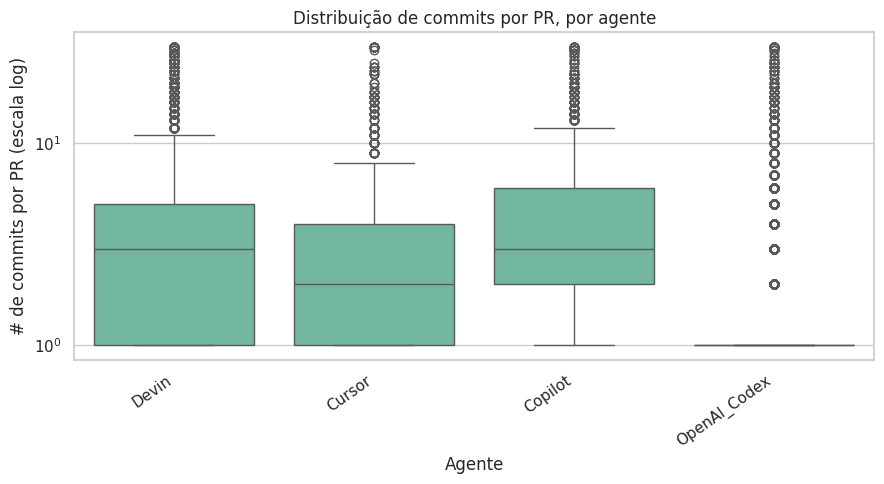

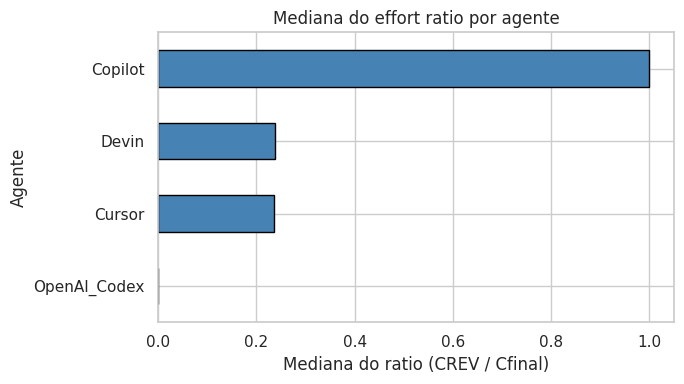

/tmp/ipython-input-2588903526.py:88: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  metricas_finais.pivot_table(


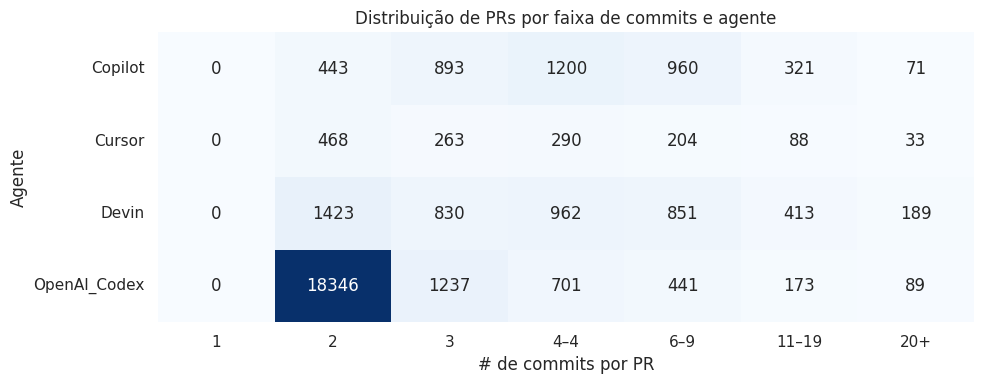

In [89]:
# ─────────────────────────────
# 9 – Visualizações aprimoradas
# ─────────────────────────────
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd   # (já está importado no script original)

# -------------------------------------------------------------------
# 0. DataFrame de trabalho
# -------------------------------------------------------------------
# No script original o DataFrame final chama-se `result`.
# Para manter o mesmo nome usado nos exemplos de plotagem,
# fazemos apenas uma cópia rótulada.
metricas_finais = result.copy()

metricas_finais = metricas_finais.query("agent != 'Claude_Code'")

# -------------------------------------------------------------------
# 0.1 Tema visual (padrão Set2, fundo claro)
# -------------------------------------------------------------------
sns.set_theme(style="whitegrid", palette="Set2")

# ────────────────────────────────────────────────────────────────────
# 9.1 Boxplot – nº de commits por PR
# ────────────────────────────────────────────────────────────────────
plt.figure(figsize=(9, 5))
sns.boxplot(
    data=metricas_finais,
    x="agent",
    y="n_commits",
    showfliers=True
)
plt.yscale("log")                              # distribuições long-tail
plt.xlabel("Agente")
plt.ylabel("# de commits por PR (escala log)")
plt.title("Distribuição de commits por PR, por agente")
plt.xticks(rotation=35, ha="right")
plt.tight_layout()
plt.show()

# ────────────────────────────────────────────────────────────────────
# 9.2 Gráfico de barras – mediana do effort ratio
# ────────────────────────────────────────────────────────────────────
med_ratio = (
    metricas_finais.groupby("agent")["ratio"]
                   .median()
                   .sort_values()              # ordem ascendente
)

med_ratio.plot(
    kind="barh",
    figsize=(7, 4),
    color="steelblue",
    edgecolor="black"
)
plt.xlabel("Mediana do ratio (CREV / Cfinal)")
plt.ylabel("Agente")
plt.title("Mediana do effort ratio por agente")
plt.tight_layout()
plt.show()

# ────────────────────────────────────────────────────────────────────
# 9.3 Heatmap – frequência de PRs por faixa de commits
# ────────────────────────────────────────────────────────────────────
max_c = metricas_finais["n_commits"].max()

# Pontos de corte “clássicos” (1, 2, 3, 5, 10, 20, 50, 100) ajustados ao max_c
base_edges = [1, 2, 3, 5, 10, 20, 50, 100]
edges = [e for e in base_edges if e < max_c]
bins = [0] + edges + [max_c + 1]

# Geração dos rótulos: 1, 2, 3–4, 5–9 … 100+
labels = []
for i in range(len(bins) - 1):
    a, b = bins[i], bins[i + 1] - 1           # right=False
    labels.append(f"{a+1}" if a == b else f"{a+1}–{b}")
labels[-1] = f"{bins[-2]}+"

metricas_finais["bucket"] = pd.cut(
    metricas_finais["n_commits"],
    bins=bins,
    labels=labels,
    right=False
)

heat = (
    metricas_finais.pivot_table(
        index="agent",
        columns="bucket",
        values="pr_id",
        aggfunc="count"
    )
    .fillna(0)
    .astype(int)
)

plt.figure(figsize=(10, 4))
sns.heatmap(
    heat,
    cmap="Blues",
    annot=True,
    fmt="d",
    cbar=False
)
plt.xlabel("# de commits por PR")
plt.ylabel("Agente")
plt.title("Distribuição de PRs por faixa de commits e agente")
plt.tight_layout()
plt.show()

# Limpa a coluna auxiliar, caso o DataFrame vá ser reutilizado depois
metricas_finais.drop(columns="bucket", inplace=True, errors="ignore")

```
https://huggingface.co/datasets/hao-li/AIDev/viewer?views%5B%5D=all_pull_request&views%5B%5D=pr_commit_details&sql=SELECT+%0A++++pcd.sha%2C%0A++++pcd.pr_id%2C%0A++++pcd.additions%2C%0A++++pcd.deletions%2C%0A++++pcd.commit_stats_additions%2C%0A++++pcd.commit_stats_deletions%2C%0A++++apr.agent%0AFROM+%0A++++pr_commit_details+pcd%0AJOIN+%0A++++all_pull_request+apr+ON+pcd.pr_id+%3D+apr.id%0AWHERE+%0A++++apr.agent+%3D+%27Copilot%27
```

## 9ª Reunião de Estudo Orientado I - 17 de Novembro de 2025

Challenge<br>


The AIDev dataset opens up rich and timely research directions around AI adoption, code quality, testing, review dynamics, risks, and human-AI collaboration in software engineering. Example research questions include (but are not limited to):

1) Adoption and Practices<br>
i. **Who adopts Coding Agents on GitHub (e.g., newcomers vs. experienced developers)?**<br>

`Essa é uma questão que eu achei interessante de se buscar a resposta. Vai exigir um Design de Pesquisa elaborado para evitar problemas como funções de mapeamento arbitrárias (ex: 10 commits --> desenvolvedor experiente) e claro, evitando pesquisas qualitativas em open-source.`

ii. How do adoption patterns vary across repositories and ecosystems?<br>
iii. What practices (e.g., PR size, task type, and commit granularity) correlate with the quality of Agentic-PRs?<br>
iv. How can these practices inform concrete guidelines for developers to work with Agentic-PRs?<br>

2) Code Patch Characteristics<br>
**i. How do Agentic-PRs change code (e.g., additions, deletions, files touched)?**<br>
ii. How consistent are their descriptions with the actual code changes?<br>
iii. To what extent do Agentic-PRs introduce original code versus reusing existing snippets?<br>
iv. What are the implications for maintainability?<br>

3) Testing Behavior<br>
i. How frequently do Coding Agents contribute tests? What types (e.g., unit, integration, end-to-end) are most common?<br>
ii. What is the test-to-code churn ratio across ecosystems?<br>
iii. When tests are missing in initial Agentic-PRs, do developers intervene to ensure reliable software testing (via follow-up commits or related PRs)?<br>

4) Review Dynamics<br>
i. What aspects of Agentic-PRs (e.g., correctness, style, security, testing) receive the most attention during review?<br>
ii. To what extent do Coding Agents address review comments?<br>
iii. Which comment types are challenging for agents to resolve?<br>

5) Failure Patterns and Risks<br>
i. What common failure patterns and code quality issues appear in Agentic-PRs? Why do they occur?<br>
ii. How can we leverage these insights to reduce failure rates, optimize human–AI collaboration, and improve AI model training that prioritizes learning from mistakes?<br>
iii. How well can early signals (e.g., PR description, touched paths, and patch characteristics) predict Agentic-PRs rejection or review effort?<br>
iv. How frequently do Agentic-PRs introduce or mitigate security vulnerabilities?<br>

RQ2 - Pesquisa Qualitativa utilizando Análise Temática

In [90]:
import pandas as pd
import pyarrow.dataset as ds
import os
import re

DIR = "./AIDev_data"

# ============================================================================
# 1. Carregar métricas já calculadas (results)
# ============================================================================
results = result  # seu dataframe já existente com as colunas de churn

print("Colunas disponíveis:", results.columns)

# ============================================================================
# 2. Selecionar PRs da análise qualitativa (RQ2)
# ============================================================================

sample_bad = results.query("ratio >= 0.9 and agent != 'Copilot'")
sample_good = results.query("ratio <= 0.1")

sample_bad = sample_bad.sample(min(25, len(sample_bad)), random_state=42)
sample_good = sample_good.sample(min(25, len(sample_good)), random_state=42)

all_samples = pd.concat([sample_bad, sample_good])

# embaralhar e remover duplicados mantendo aleatoriedade
sample_ids = (
    all_samples.sample(frac=1, random_state=42)["pr_id"]
    .drop_duplicates()
    .tolist()
)

sample_ids_set = set(sample_ids)

print("PRs selecionados (ordem aleatória):", len(sample_ids))
print(sample_ids)

print("PRs selecionados:", len(sample_ids))
print(sample_ids)

# ============================================================================
# 3. Função segura para ler Parquet filtrando apenas os PRs desejados
# ============================================================================

def load_filtered_parquet(path, filter_column="pr_id"):
    dataset = ds.dataset(path, format="parquet")
    table = dataset.to_table(filter=ds.field(filter_column).isin(sample_ids_set))
    return table.to_pandas()

# ============================================================================
# 4. Carregar mapeamento PR (para reconstruir pr_id em review comments)
# ============================================================================
PATH_ALL_PR = os.path.join(DIR, "all_pull_request.parquet")
all_pr = pd.read_parquet(PATH_ALL_PR, columns=["id", "number", "repo_url"])

pr_map = {
    (row.repo_url, row.number): row.id
    for row in all_pr.itertuples()
}

# ============================================================================
# 5–7. Carregar comentários de cada fonte
# ============================================================================

# pr_comments
PATH_COMMENTS = os.path.join(DIR, "pr_comments.parquet")
comments_A = load_filtered_parquet(PATH_COMMENTS)[
    ["pr_id", "user", "user_type", "created_at", "body"]
]
comments_A["source"] = "pr_comments"

# pr_reviews
PATH_REVIEWS = os.path.join(DIR, "pr_reviews.parquet")
comments_B = load_filtered_parquet(PATH_REVIEWS)[
    ["pr_id", "user", "state", "submitted_at", "body"]
]
comments_B = comments_B.rename(columns={"submitted_at": "created_at"})
comments_B["source"] = "pr_reviews"

# pr_review_comments_v2
PATH_REVIEW_COMMENTS = os.path.join(DIR, "pr_review_comments_v2.parquet")
reviews_raw = pd.read_parquet(PATH_REVIEW_COMMENTS)

reviews_raw["pr_number"] = reviews_raw["pull_request_url"].str.extract(r'/pulls/(\d+)')
reviews_raw["pr_number"] = reviews_raw["pr_number"].astype(float).astype("Int64")
reviews_raw["repo_url"] = reviews_raw["pull_request_url"].str.extract(
    r"(https://api.github.com/repos/[^/]+/[^/]+)"
)

def resolve_pr_id(row):
    return pr_map.get((row["repo_url"], row["pr_number"]))

reviews_raw["pr_id"] = reviews_raw.apply(resolve_pr_id, axis=1)

comments_C = reviews_raw[reviews_raw["pr_id"].isin(sample_ids_set)][
    ["pr_id", "user", "path", "diff_hunk", "body", "created_at"]
]
comments_C["source"] = "pr_review_comments"

# ============================================================================
# 8. Unificar comentários
# ============================================================================
comments_all = pd.concat([comments_A, comments_B, comments_C], ignore_index=True)
comments_all = comments_all[
    comments_all["body"].notna() & (comments_all["body"].str.strip() != "")
]

# ============================================================================
# 8.5 ENRIQUECER: adicionar agent e ratio ao dataframe
# ============================================================================
meta = results[["pr_id", "agent", "ratio"]]
comments_all = comments_all.merge(meta, on="pr_id", how="left")

# ============================================================================
# 9. Salvar CSV final
# ============================================================================
comments_all.to_csv("comments_for_RQ2.csv", index=False)

print("🔥 Arquivo salvo com sucesso: comments_for_RQ2.csv")
print("Total de comentários extraídos:", len(comments_all))

Colunas disponíveis: Index(['pr_id', 'C0', 'CREV', 'Cfinal', 'ratio', 'delta_pct', 'agent',
       'merge_sha', 'n_commits'],
      dtype='object')
PRs selecionados (ordem aleatória): 50
[3267057229, 3166296623, 3105454469, 3157907269, 3209856906, 3271692975, 3276117521, 3227185478, 3257215318, 2835588152, 3262961474, 2920607824, 3221490963, 3137614567, 3121850105, 3190011828, 3246106705, 3220651299, 3243755675, 3166348724, 2920442892, 2794549110, 3076237105, 3144006835, 3087401823, 3210283861, 3155075782, 3245827866, 3127827278, 2982196705, 2801228245, 3210213419, 3108425956, 3176390729, 2814482277, 3107487935, 3252937476, 3072704590, 3178837693, 3184031656, 2961962111, 3121814401, 2982953659, 3206373759, 3029913116, 3049889451, 3242775641, 3209183782, 3216859277, 3172601654]
PRs selecionados: 50
[3267057229, 3166296623, 3105454469, 3157907269, 3209856906, 3271692975, 3276117521, 3227185478, 3257215318, 2835588152, 3262961474, 2920607824, 3221490963, 3137614567, 3121850105, 3190011828

In [91]:
comments_all

,pr_id,user,user_type,created_at,body,source,state,path,diff_hunk,agent,ratio
0,3.121850e+09,use-tusk[bot],Bot,2025-06-05T16:43:16Z,**⏩ Already incorporated tests (1bb28ab3e44354...,pr_comments,NaN,NaN,NaN,OpenAI_Codex,0.934256
1,3.262961e+09,coderabbitai[bot],Bot,2025-07-25T11:52:05Z,<!-- This is an auto-generated comment: summar...,pr_comments,NaN,NaN,NaN,OpenAI_Codex,0.943560
2,3.178838e+09,codecov[bot],Bot,2025-06-26T12:18:02Z,## [Codecov](https://app.codecov.io/gh/AMICI-d...,pr_comments,NaN,NaN,NaN,OpenAI_Codex,0.999389
3,3.178838e+09,sonarqubecloud[bot],Bot,2025-06-26T15:01:19Z,## [![Quality Gate Passed](https://sonarsource...,pr_comments,NaN,NaN,NaN,OpenAI_Codex,0.999389
4,3.220651e+09,coderabbitai[bot],Bot,2025-07-10T20:47:50Z,<!-- This is an auto-generated comment: summar...,pr_comments,NaN,NaN,NaN,OpenAI_Codex,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
134,2.794549e+09,mldangelo,NaN,2025-01-17T04:39:09Z,@devin-ai-integration use `import { isJavascri...,pr_review_comments,NaN,src/csv.ts,"@@ -58,6 +58,13 @@ export function assertionFr...",Devin,0.968326
135,2.920608e+09,shreyan-gupta,NaN,2025-03-14T16:24:22Z,Remove new line in all toml files modified,pr_review_comments,NaN,benchmarks/transactions-generator/Cargo.toml,"@@ -9,21 +9,13 @@ license.workspace = true\n p...",Devin,0.993684
136,2.920443e+09,hassan254-prog,NaN,2025-05-24T14:20:19Z,"@khaliqgant, I omitted the shared API gotchas ...",pr_review_comments,NaN,docs-v2/integrations/all/microsoft-business-ce...,"@@ -33,15 +32,38 @@ _No setup guide yet._\n \n...",Devin,0.999995
137,2.920608e+09,shreyan-gupta,NaN,2025-03-14T15:57:45Z,remove these two lines as they are repetition ...,pr_review_comments,NaN,runtime/runtime-params-estimator/src/main.rs,"@@ -354,8 +354,8 @@ fn main_container(\n ...",Devin,0.993684


In [92]:
import pandas as pd
import os

# Diretório dos dados
DIR = "./AIDev_data"
PR_PATH = os.path.join(DIR, "all_pull_request.parquet")

# Lista dos PRs da amostra
sample_ids = [2791971139, 3074838163, 3117353919, 3184082070, 3045866074, 3242580600, 3157586804, 3242965887, 3245132478, 3204638331, 3245682772, 3085149115, 3153919447, 3199191078, 3072069122, 3126215556, 3144770565, 3082908494, 3244774153, 2906301362, 2989362059, 3127925920, 3126249131, 3263262623, 2861780617, 3125966641, 3070064117, 3214389367, 3164661520, 2815602191, 3181371441, 3081788219, 3165688361, 3216373575, 2971108176, 3100461288, 3254376822, 3143560359, 3030054309, 3148008733, 3118224125, 3196526840, 2912249467, 3205134266, 3115742256, 2894930869, 3143862513, 2884473950, 3074773765, 3156703484]

# =============================
# 1. Carregar PRs brutos (título, URL, etc.)
# =============================
prs = pd.read_parquet(PR_PATH, columns=[
    "id", "html_url", "title", "agent"
]).rename(columns={"id": "pr_id"})

# =============================
# 2. Carregar o dataframe de métricas (result com ratio)
# =============================
# Aqui assumimos que você já tem o dataframe "result" na memória.
metrics = result[["pr_id", "ratio", "agent"]].copy()

# =============================
# 3. Filtrar os PRs desejados
# =============================
selected_prs = prs[prs["pr_id"].isin(sample_ids)]

# =============================
# 4. Combinar PRs + métricas (ratio)
# =============================
merged = selected_prs.merge(metrics, on="pr_id", how="left", suffixes=("", "_metrics"))

# Caso agente no PR esteja vazio, usar agente das métricas
merged["agent"] = merged["agent"].fillna(merged["agent_metrics"])
merged = merged.drop(columns=["agent_metrics"])

# =============================
# 5. Ordenar para melhor leitura
# =============================
merged = merged.sort_values("ratio", ascending=False)

# =============================
# 6. Salvar CSV final
# =============================
merged.to_csv("selected_pr_links_with_ratio.csv", index=False)

print("\n🔥 Arquivo exportado: selected_pr_links_with_ratio.csv")
print("Total de PRs exportados:", len(merged))

merged


🔥 Arquivo exportado: selected_pr_links_with_ratio.csv
Total de PRs exportados: 50


,pr_id,html_url,title,agent,ratio
41,3045866074,https://github.com/calcom/cal.com/pull/21152,test: add unit tests for getWhereForTeamOrAllT...,Devin,0.999978
32,3085149115,https://github.com/promptfoo/promptfoo/pull/4131,chore(redteam): add label strategyless plugins...,OpenAI_Codex,0.999973
20,3125966641,https://github.com/prebid/Prebid.js/pull/13305,Adtrue bid adapter: improve test coverage,OpenAI_Codex,0.999969
30,3081788219,https://github.com/wandb/weave/pull/4555,fix(weave): exclude null ref from object seria...,OpenAI_Codex,0.999966
43,2791971139,https://github.com/appsmithorg/appsmith/pull/3...,feat: update autocomplete sorting,Devin,0.999965
39,2884473950,https://github.com/ComposioHQ/composio/pull/1378,feat: migrate from pipenv to uv package manager,Devin,0.999767
44,2971108176,https://github.com/near/nearcore/pull/13276,Deprecate ComputeCosts and FlatStorageReads fe...,Devin,0.999515
48,3100461288,https://github.com/theopenco/llmgateway/pull/252,feat: require organizationId in provider key c...,Devin,0.994944
40,3030054309,https://github.com/fjordllc/bootcamp/pull/8594,Fix: ヘッドレスChromeモードでのJavaScriptアラート処理を修正,Devin,0.994628
31,3245682772,https://github.com/parse-community/parse-dashb...,fix: Modal text input can be resized smaller t...,OpenAI_Codex,0.993333


In [93]:
result[result["pr_id"] == 3204638331]

,pr_id,C0,CREV,Cfinal,ratio,delta_pct,agent,merge_sha,n_commits
20702,3204638331,21060,85,21145,0.00402,0.004036,OpenAI_Codex,49dc61e4a0da7b46894181bb104e43d9dcc68517,2


In [94]:
full[full["pr_id"] == 3204638331].sort_values("order")

,pr_id,sha,order,churn
21997,3204638331,ceb7938d292334035c51f127a6516e7e86636a60,1,21060
21998,3204638331,49dc61e4a0da7b46894181bb104e43d9dcc68517,2,85


In [95]:
reviews_raw[reviews_raw["pr_id"] == 3204638331]["body"].values

array(['![critical](https://www.gstatic.com/codereviewagent/critical.svg)\n\nThis line has incorrect indentation. It seems to have an extra level of indentation compared to the surrounding code, which will cause an `IndentationError` at runtime.\n\n```suggestion\n        msgsInBatch = 0\n```',
       '![critical](https://www.gstatic.com/codereviewagent/critical.svg)\n\nThis line has incorrect indentation. It seems to have an extra level of indentation compared to the surrounding code, which will cause an `IndentationError` at runtime.\n\n```suggestion\n        msgsInBatch = 0\n```',
       '![high](https://www.gstatic.com/codereviewagent/high-priority.svg)\n\nThe `break` statement on this line is unreachable because it follows a `return` statement within the same `if` block. It should be removed.',
       '![medium](https://www.gstatic.com/codereviewagent/medium-priority.svg)\n\nThe closing brace `}` for the `patterns` dictionary is not correctly indented according to PEP 8. It should 

In [96]:
print(selected_prs[selected_prs["pr_id"] == 3204638331]["html_url"])

231325    https://github.com/rsyslog/rsyslog/pull/5745
Name: html_url, dtype: object
